# Trading Strategy Reconstruction: <Strategy Name>


## Introduction
Briefly describe the trading strategy. Mention the academic paper it comes from, the authors, and the main premise of the strategy.


## Background

#### Theory
Provide a summary or key points from the academic paper. This might include:
- Assumptions made in the paper.
- The theoretical foundation of the strategy.
- Any supporting or opposing views from other academics or practitioners.

#### Key Concepts
Present and explain key formulas or concepts from the paper. This might include algorithm pseudocode, mathematical formulas, or other theoretical concepts vital to understanding the strategy.

## Data Acquisition and Cleaning

#### Data Sources
Discuss the data sources used, e.g., Yahoo Finance, proprietary databases, etc.

In [1]:
# Step 1: Install necessary packages
import sys
sys.path.append("../../")  # This adds the parent directory (main directory) to the sys path

from utils import DataHandler, AnalysisTools, Visualization, Normalization

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### Data Retrieval
Include code cells that fetch the data. If you're using `yfinance`, show how you're fetching the data.

In [11]:
# Step 2: Download Data
stock_codes = ["AAPL", "MSFT"]
start = "2023-06-18"
end = "2023-08-08"

data_handler = DataHandler(tickers=stock_codes, start_date=start, end_date=end,  )


[*********************100%***********************]  2 of 2 completed


#### Data Cleaning
Present any steps or transformations you undertake to clean or preprocess the data. This might include handling missing data, outliers, or converting data to a format suitable for backtesting.

In [12]:
data_handler.null_check_and_clean()


No null values in dataframe.


In [18]:
data_analysis = AnalysisTools.TechnicalAnalysis(data_handler.df)
atr_close = data_analysis.ATR()
x = Normalization.zscore(atr_close)

                           AAPL                  MSFT          
                          Close       ATR       Close       ATR
Datetime                                                       
2023-06-30 09:30:00  191.755905       NaN  339.160004       NaN
2023-06-30 09:32:00  191.615494       NaN  339.240112       NaN
2023-06-30 09:34:00  191.854996       NaN  339.433289       NaN
2023-06-30 09:36:00  191.809799       NaN  339.190002       NaN
2023-06-30 09:38:00  191.910095       NaN  339.510010       NaN
...                         ...       ...         ...       ...
2023-08-07 15:50:00  178.705002  0.156320  330.190002  0.268285
2023-08-07 15:52:00  178.931000  0.166225  330.024994  0.279123
2023-08-07 15:54:00  179.001205  0.180780  329.980103  0.287757
2023-08-07 15:56:00  178.970001  0.175010  330.154999  0.290058
2023-08-07 15:58:00  178.800003  0.196081  330.109985  0.282911

[4974 rows x 4 columns]


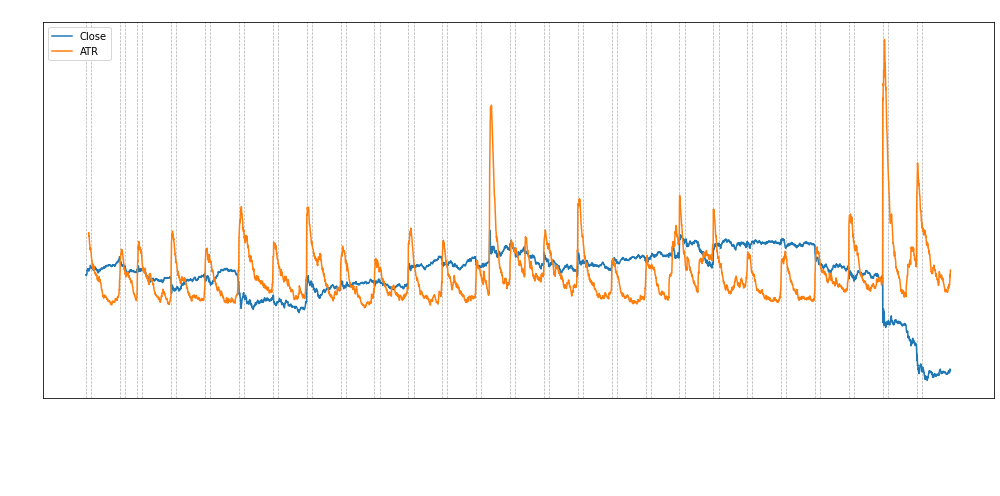

In [22]:
print(atr_close)
Visualization.plot_data(x['AAPL'], "AAPL with ATR", is_normalized=True)

In [25]:
coint_tests = AnalysisTools.Cointegration(atr_close['AAPL']['Close'], atr_close['AAPL']['ATR'].dropna())
coint_tests.adf_test()

Results for Series 1:
Test Statistic             0.202979
p-value                    0.972428
# Lags                     9.000000
# Observations          4964.000000
Critical Value (1%)       -3.431668
Critical Value (5%)       -2.862122
Critical Value (10%)      -2.567080
dtype: float64
Series 1 is Non-Stationary at 0.05 level of significance

Results for Series 2:
Test Statistic         -8.530205e+00
p-value                 1.042650e-13
# Lags                  1.400000e+01
# Observations          4.945000e+03
Critical Value (1%)    -3.431673e+00
Critical Value (5%)    -2.862125e+00
Critical Value (10%)   -2.567081e+00
dtype: float64
Series 2 is Stationary at 0.05 level of significance



## Strategy Construction

#### Pseudocode
Provide a high-level pseudocode or step-by-step approach to the strategy's logic. This helps in understanding and then coding the strategy.

#### Strategy Implementation
The actual Python code that constructs the strategy. This might involve defining trading signals, calculating indicators, or any other computation that forms the strategy's logic.

## Backtesting

#### Setting Parameters
Define any parameters for backtesting - like initial capital, transaction costs, etc.

#### Running the Backtest
Show the code for running the backtest. This might involve looping through the data and applying the strategy logic to make buy/sell decisions.

#### Metrics & Results
Present key performance metrics: 
- Total Return
- Annualized Return
- Maximum Drawdown
- Sharpe Ratio, etc.

## Visualization

Provide visual representations:
- Cumulative returns over time.
- Drawdowns.
- Maybe a comparison with benchmark returns.
- Histogram of returns, etc.

## Conclusion

Summarize the findings:
- Did the strategy perform well?
- How did it compare to a benchmark or to expectations set out in the academic paper?
- Potential improvements or modifications.

## References

- List the academic papers, books, or any other resources referred to in the notebook.